In [ ]:
#http://scipy-cookbook.readthedocs.io/items/FittingData.html

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

class Parameter:
    def __init__(self, value):
            self.value = value

    def set(self, value):
            self.value = value

    def __call__(self):
            return self.value

def fit(function, parameters, y, x = None):
    def f(params):
        i = 0
        for p in parameters:
            p.set(params[i])
            i += 1
        return y - function(x)

    if x is None: x = np.arange(y.shape[0])
    p = [param() for param in parameters]
    return optimize.leastsq(f, p)

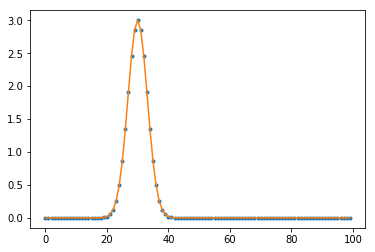

In [10]:
gaussian = lambda x: 3*np.exp(-(30-x)**2/20.)

data = gaussian(np.arange(100))

plt.plot(data, '.')

X = np.arange(data.size)
x = np.sum(X*data)/np.sum(data)
width = np.sqrt(np.abs(np.sum((X-x)**2*data)/np.sum(data)))

max = data.max()

fit = lambda t : max*np.exp(-(t-x)**2/(2*width**2))

plt.plot(fit(X), '-')

In [11]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

Text(0.95,0.05,'\nx : 100.1\ny : 99.9\nwidth_x : 34.2\nwidth_y : 55.3')

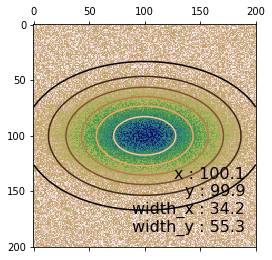

In [12]:
# Create the gaussian data
Xin, Yin = np.mgrid[0:201, 0:201]
data = gaussian(3, 100, 100, 20, 40)(Xin, Yin) + np.random.random(Xin.shape)

plt.matshow(data, cmap=plt.cm.gist_earth_r)

params = fitgaussian(data)
fit = gaussian(*params)

plt.contour(fit(*np.indices(data.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height, x, y, width_x, width_y) = params

plt.text(0.95, 0.05, """
x : %.1f
y : %.1f
width_x : %.1f
width_y : %.1f""" %(x, y, width_x, width_y),
        fontsize=16, horizontalalignment='right',
        verticalalignment='bottom', transform=ax.transAxes)

In [ ]:
# 3D gaussian

In [14]:
def gaussian3d(height, center_x, center_y, center_z, width_x, width_y,  width_z):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    width_z = float(width_z)
    return lambda x,y,z: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2+((center_z-z)/width_z)**2)/2)

(100, 100, 100)
(100, 100)
(3, 201, 201, 201)
(100, 100, 100)
0.183153176748


TypeError: scatter() missing 1 required positional argument: 'ys'

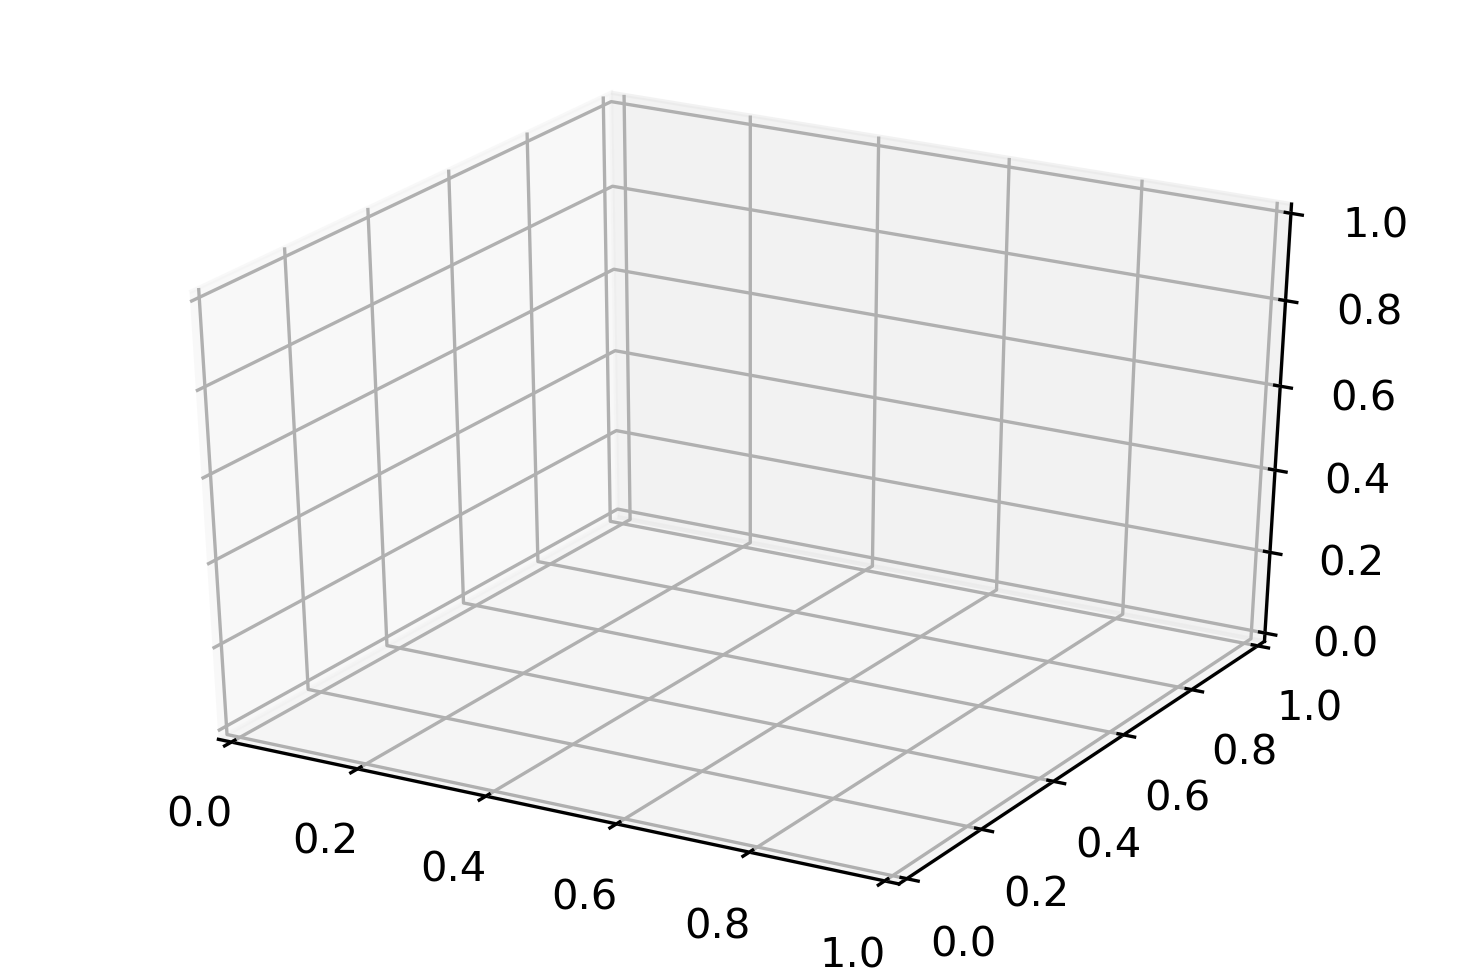

In [68]:
Xin, Yin, Zin = np.mgrid[0:100, 0:100, 0:100]
data = gaussian3d(3, 50, 25,0, 20, 40,60)(Xin, Yin, Zin) + np.random.random(Xin.shape)

print(data.shape)
print(data[:,0].shape)
print((np.mgrid[0:201, 0:201, 0:201]).shape)
print(Xin.shape)

print(data[0,0,0])
#plt.matshow(data, cmap=plt.cm.gist_earth_r)
#x,y,z = Xin
#print(x)
plt.figure(dpi=300)
ax = plt.axes(projection='3d')
##  #    plt.title(title)
##      # Data for a three-dimensional line
##  x = data[:0]
##  y = data[:1]
##  z = data[:2]
##  #    intensity = data['A'].values[0:100000]
##  #    print(np.log(intensity))
##  #    print(len(intensity))
##  #    ax.plot3D(x, y, z, 'gray')
#ax.scatter3D(Xin, Yin, Zin, c='red',alpha=0.1,s=5);
ax.scatter3D(Xin, c='red',alpha=0.1,s=5);

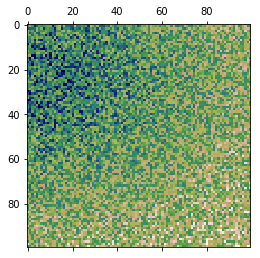

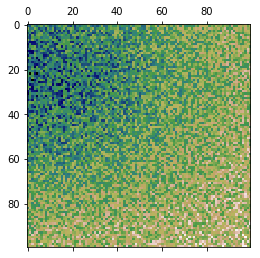

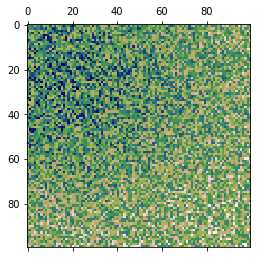

In [64]:
plt.matshow(data[15], cmap=plt.cm.gist_earth_r)
plt.show()
plt.matshow(data[20], cmap=plt.cm.gist_earth_r)
plt.show()
plt.matshow(data[90], cmap=plt.cm.gist_earth_r)
plt.show()

In [45]:
a,b,c,d,e = data

ValueError: too many values to unpack (expected 5)